## Johns Hopkins Covid19

### Data Overview and Introduction
- Dataset Description: The COVID-19 Data Repository by Johns Hopkins University (JHU) provides a comprehensive collection of COVID-19 data, updated daily at 6 AM UTC. It includes confirmed cases and deaths at the country level and US county level, along with various metadata. The data is available in two versions: the RAW version, which mirrors the original dataset, and the CONVENIENT version, which is organized for easier analysis. The CONVENIENT version includes daily changes in cases and deaths (instead of cumulative totals) and separates metadata into distinct files.
- Problem Statement: The objective is to track the global and regional progression of COVID-19, monitor trends in cases and deaths, and predict future changes based on historical data. This dataset supports analyses like understanding virus spread, identifying high-risk areas, and forecasting future cases and mortality. It can be used to develop predictive models, assess the impact of interventions, and prepare for future healthcare needs. It aids in forecasting and planning for COVID-19’s ongoing impact.

### 1. Import Libraries and Load the Dataset
In this step, you need to import all the libraries required for the analysis and load the dataset into the notebook.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
warnings.filterwarnings('ignore')

### 2. Data Preparation
Data Collection and Loading: Load the dataset into a suitable environment (e.g. Pandas DataFrame).

In [3]:
# loading dataset
confirmed_df = pd.read_csv('time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('time_series_covid19_recovered_global.csv')

In [5]:
# showing 1st five rows
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,09-12-2020,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,48007,48254,48496,48734,48966,49194,49413,49623,49826,50023
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1344,1344,1438,1438,1483,1483,1564,1564,1564,1681
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,3335,3388,3439,3569,3675,3789,3848,3901,3991,4117


### 3.1. Basic Checks for Confirmed Cases

In [7]:
# showing 1st five rows
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,09-12-2020,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,48007,48254,48496,48734,48966,49194,49413,49623,49826,50023
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1344,1344,1438,1438,1483,1483,1564,1564,1564,1681
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,3335,3388,3439,3569,3675,3789,3848,3901,3991,4117


In [9]:
# showing last five rows
confirmed_df.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,09-12-2020,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
261,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,29906,30574,31362,32250,33006,33843,34401,35003,35686,36151
262,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2009,2011,2013,2016,2019,2022,2024,2026,2026,2028
264,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,13466,13539,13720,13819,13887,13928,14022,14070,14131,14175
265,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,...,7508,7526,7531,7576,7598,7633,7647,7672,7683,7683


In [11]:
confirmed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 248 entries, Province/State to 9/21/20
dtypes: float64(2), int64(244), object(2)
memory usage: 515.5+ KB


In [13]:
confirmed_df.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,09-12-2020,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,...,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02
mean,21.076624,22.829441,2.086466,2.458647,3.537594,5.390977,7.962406,11.003759,20.969925,23.180451,...,1.081163e+05,1.090052e+05,1.100551e+05,1.111201e+05,1.122630e+05,1.134410e+05,1.146599e+05,1.157171e+05,1.166240e+05,1.174654e+05
std,24.904600,70.191330,27.279200,27.377862,34.083035,47.434934,66.289178,89.313757,219.187744,220.524977,...,5.678329e+05,5.727452e+05,5.774877e+05,5.831820e+05,5.891235e+05,5.953081e+05,6.017349e+05,6.076737e+05,6.126599e+05,6.154886e+05
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.677575,-15.277675,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.672500e+02,4.675000e+02,4.675000e+02,4.682500e+02,4.682500e+02,4.707500e+02,4.707500e+02,4.707500e+02,4.707500e+02,4.710000e+02
50%,22.820850,20.921188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.354500e+03,3.381000e+03,3.397000e+03,3.459000e+03,3.466000e+03,3.522500e+03,3.608000e+03,3.714500e+03,3.772000e+03,3.823500e+03
75%,41.143200,77.913685,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.472475e+04,3.540750e+04,3.553900e+04,3.580200e+04,3.599400e+04,3.639525e+04,3.670825e+04,3.731275e+04,3.781650e+04,3.826325e+04
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,6.485123e+06,6.520122e+06,6.553652e+06,6.592342e+06,6.630051e+06,6.674411e+06,6.723933e+06,6.768119e+06,6.804814e+06,6.856884e+06


In [15]:
confirmed_df.isnull().sum()

Province/State    185
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
9/17/20             0
9/18/20             0
9/19/20             0
9/20/20             0
9/21/20             0
Length: 248, dtype: int64

### 3.2. Basic Checks for Deaths

In [17]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,09-12-2020,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1420,1420,1425,1426,1436,1436,1437,1437,1441,1444
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,330,334,338,340,343,347,353,358,362,364
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,1605,1612,1620,1632,1645,1654,1659,1665,1672,1679
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,132,134,136,139,143,144,147,147,152,154


In [19]:
deaths_df.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,09-12-2020,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
261,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,210,221,226,229,243,244,250,253,262,265
262,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,582,583,583,583,583,585,585,585,586,586
264,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,312,312,320,324,326,326,329,330,330,331
265,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,...,224,224,224,224,224,224,224,225,225,225


In [21]:
deaths_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 248 entries, Province/State to 9/21/20
dtypes: float64(2), int64(244), object(2)
memory usage: 515.5+ KB


In [23]:
deaths_df.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,09-12-2020,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,...,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000
mean,21.076624,22.829441,0.063910,0.067669,0.097744,0.157895,0.210526,0.308271,0.492481,0.500000,...,3459.515038,3473.206767,3489.860902,3514.481203,3536.109023,3556.620301,3578.071429,3597.740602,3611.635338,3622.906015
std,24.904600,70.191330,1.042337,1.043908,1.473615,2.453621,3.189730,4.660845,7.664297,7.664793,...,16398.950919,16453.471108,16510.259597,16636.850630,16739.311674,16831.543769,16934.234212,17019.787840,17068.307397,17102.864472
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.677575,-15.277675,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,5.250000,5.250000,5.250000,5.250000,5.250000,5.250000,5.250000,5.250000,5.250000
50%,22.820850,20.921188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,57.000000,57.000000,57.000000,58.000000,59.000000,60.500000,61.500000,62.500000,64.000000,64.500000
75%,41.143200,77.913685,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,588.000000,588.250000,611.500000,620.500000,620.500000,622.500000,629.000000,635.750000,645.500000,647.500000
max,71.706900,178.065000,17.000000,17.000000,24.000000,40.000000,52.000000,76.000000,125.000000,125.000000,...,193693.000000,194071.000000,194493.000000,195781.000000,196763.000000,197633.000000,198570.000000,199282.000000,199509.000000,199865.000000


In [25]:
deaths_df.isnull().sum()

Province/State    185
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
9/17/20             0
9/18/20             0
9/19/20             0
9/20/20             0
9/21/20             0
Length: 248, dtype: int64

### 3.3. Basic Checks for Recovered Cases

In [27]:
recovered_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,09-12-2020,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,31234,31638,32073,32098,32503,32505,32576,32576,32576,32576
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,6494,6569,6615,6668,6733,6788,6831,6888,6940,6995
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,33875,34037,34204,34385,34517,34675,34818,34923,35047,35180
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,943,943,945,945,1054,1054,1164,1164,1164,1199
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1289,1301,1324,1332,1401,1405,1443,1445,1445,1449


In [29]:
recovered_df.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,09-12-2020,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
248,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,19979,20082,21406,21804,22209,23060,23333,23446,23700,24428
249,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,8,8,8,8,8,8,8,8,8,8
250,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1211,1212,1215,1219,1221,1221,1221,1221,1227,1235
251,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,12007,12260,12380,12590,12869,13029,13207,13365,13365,13629
252,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,...,5675,5678,5690,5783,5823,5841,5883,5914,5924,5924


In [31]:
recovered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Columns: 248 entries, Province/State to 9/21/20
dtypes: float64(2), int64(244), object(2)
memory usage: 490.3+ KB


In [33]:
recovered_df.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,09-12-2020,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,...,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02
mean,19.835137,27.997068,0.110672,0.118577,0.142292,0.154150,0.205534,0.241107,0.422925,0.498024,...,7.683461e+04,7.756891e+04,7.847586e+04,7.936355e+04,8.026853e+04,8.113512e+04,8.213040e+04,8.307036e+04,8.400322e+04,8.456361e+04
std,24.504550,67.358197,1.760345,1.764332,1.954723,2.020714,2.649732,2.852382,5.059859,5.566071,...,3.738531e+05,3.774536e+05,3.831228e+05,3.886656e+05,3.941652e+05,3.993233e+05,4.045893e+05,4.106165e+05,4.159772e+05,4.178944e+05
min,-51.796300,-106.346800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.428055,-8.224500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.680000e+02,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02,3.800000e+02,3.800000e+02
50%,21.521757,23.881300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.991000e+03,1.991000e+03,2.071000e+03,2.094000e+03,2.104000e+03,2.112000e+03,2.128000e+03,2.197000e+03,2.239000e+03,2.369000e+03
75%,39.305400,85.240100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.997900e+04,2.008200e+04,2.120600e+04,2.153600e+04,2.175200e+04,2.266200e+04,2.316000e+04,2.336400e+04,2.336400e+04,2.336400e+04
max,71.706900,178.065000,28.000000,28.000000,31.000000,32.000000,42.000000,45.000000,80.000000,88.000000,...,3.723206e+06,3.780107e+06,3.859399e+06,3.942360e+06,4.025079e+06,4.112551e+06,4.208431e+06,4.303043e+06,4.396399e+06,4.396399e+06


In [35]:
recovered_df.isnull().sum()

Province/State    186
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
9/17/20             0
9/18/20             0
9/19/20             0
9/20/20             0
9/21/20             0
Length: 248, dtype: int64

In [37]:
confirmed_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '09-12-2020', '9/13/20', '9/14/20', '9/15/20', '9/16/20', '9/17/20',
       '9/18/20', '9/19/20', '9/20/20', '9/21/20'],
      dtype='object', length=248)

### 4. Data Transformation

#### Unpivot Data and format the date

In [39]:
#Confirmed Cases
confirmed_df_unpiv = confirmed_df.melt(id_vars=['Country/Region','Province/State','Lat','Long'],var_name='Date',value_name='Confirmed')
confirmed_df_unpiv['Date']= pd.to_datetime(confirmed_df_unpiv['Date']).dt.strftime('%Y/%m/%d')

#Deaths
deaths_df_unpiv = deaths_df.melt(id_vars=['Country/Region','Province/State','Lat','Long'],var_name='Date',value_name='Deaths')
deaths_df_unpiv['Date']= pd.to_datetime(deaths_df_unpiv['Date']).dt.strftime('%Y/%m/%d')

#Recovered
recovered_df_unpiv = recovered_df.melt(id_vars=['Country/Region','Province/State','Lat','Long'],var_name='Date',value_name='Recovered')
recovered_df_unpiv['Date']= pd.to_datetime(recovered_df_unpiv['Date']).dt.strftime('%Y/%m/%d')

confirmed_df_unpiv[confirmed_df_unpiv['Country/Region']=='Germany']

,Country/Region,Province/State,Lat,Long,Date,Confirmed
130,Germany,NaN,51.165691,10.451526,2020/01/22,0
396,Germany,NaN,51.165691,10.451526,2020/01/23,0
662,Germany,NaN,51.165691,10.451526,2020/01/24,0
928,Germany,NaN,51.165691,10.451526,2020/01/25,0
1194,Germany,NaN,51.165691,10.451526,2020/01/26,0
...,...,...,...,...,...,...
63704,Germany,NaN,51.165691,10.451526,2020/09/17,269048
63970,Germany,NaN,51.165691,10.451526,2020/09/18,271247
64236,Germany,NaN,51.165691,10.451526,2020/09/19,272932
64502,Germany,NaN,51.165691,10.451526,2020/09/20,273965


#### Join the confirmed cases with the deaths statistics and recovered

In [41]:
df_merge = pd.merge(confirmed_df_unpiv, deaths_df_unpiv, left_on=['Date','Country/Region','Province/State','Lat','Long'], right_on=['Date','Country/Region','Province/State','Lat','Long'])
df_merge = pd.merge(df_merge, recovered_df_unpiv, left_on=['Date','Country/Region','Province/State','Lat','Long'], right_on=['Date','Country/Region','Province/State','Lat','Long'],how='left')

df_merge = df_merge.filter(['Country/Region','Province/State','Lat','Long','Date','Confirmed','Deaths','Recovered'])

df_merge

,Country/Region,Province/State,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Afghanistan,NaN,33.939110,67.709953,2020/01/22,0,0,0.0
1,Albania,NaN,41.153300,20.168300,2020/01/22,0,0,0.0
2,Algeria,NaN,28.033900,1.659600,2020/01/22,0,0,0.0
3,Andorra,NaN,42.506300,1.521800,2020/01/22,0,0,0.0
4,Angola,NaN,-11.202700,17.873900,2020/01/22,0,0,0.0
...,...,...,...,...,...,...,...,...
64899,West Bank and Gaza,NaN,31.952200,35.233200,2020/09/21,36151,265,24428.0
64900,Western Sahara,NaN,24.215500,-12.885800,2020/09/21,10,1,8.0
64901,Yemen,NaN,15.552727,48.516388,2020/09/21,2028,586,1235.0
64902,Zambia,NaN,-13.133897,27.849332,2020/09/21,14175,331,13629.0


#### Check country

In [43]:
df_merge[df_merge['Country/Region']=='Germany'].tail(100)

,Country/Region,Province/State,Lat,Long,Date,Confirmed,Deaths,Recovered
38434,Germany,NaN,51.165691,10.451526,2020/06/14,187518,8801,172089.0
38700,Germany,NaN,51.165691,10.451526,2020/06/15,187682,8807,172692.0
38966,Germany,NaN,51.165691,10.451526,2020/06/16,188252,8820,172842.0
39232,Germany,NaN,51.165691,10.451526,2020/06/17,188604,8851,173599.0
39498,Germany,NaN,51.165691,10.451526,2020/06/18,189817,8875,173847.0
...,...,...,...,...,...,...,...,...
63704,Germany,NaN,51.165691,10.451526,2020/09/17,269048,9376,238437.0
63970,Germany,NaN,51.165691,10.451526,2020/09/18,271247,9386,239654.0
64236,Germany,NaN,51.165691,10.451526,2020/09/19,272932,9388,240510.0
64502,Germany,NaN,51.165691,10.451526,2020/09/20,273965,9390,241192.0


#### Save countries with covid cases

In [45]:
df_country_group = df_merge.groupby(['Country/Region']).last().reset_index()
df_country_group

,Country/Region,Province/State,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Afghanistan,None,33.939110,67.709953,2020/09/21,39074,1444,32576.0
1,Albania,None,41.153300,20.168300,2020/09/21,12535,364,6995.0
2,Algeria,None,28.033900,1.659600,2020/09/21,50023,1679,35180.0
3,Andorra,None,42.506300,1.521800,2020/09/21,1681,53,1199.0
4,Angola,None,-11.202700,17.873900,2020/09/21,4117,154,1449.0
...,...,...,...,...,...,...,...,...
183,West Bank and Gaza,None,31.952200,35.233200,2020/09/21,36151,265,24428.0
184,Western Sahara,None,24.215500,-12.885800,2020/09/21,10,1,8.0
185,Yemen,None,15.552727,48.516388,2020/09/21,2028,586,1235.0
186,Zambia,None,-13.133897,27.849332,2020/09/21,14175,331,13629.0


#### Group by country

In [47]:
df_country = df_merge.groupby(['Country/Region','Province/State','Date']).max().reset_index()
df_country = df_merge.groupby(['Country/Region','Date']).sum().reset_index()
df_country = df_country[['Country/Region','Date','Confirmed','Deaths','Recovered']]
df_country

,Country/Region,Date,Confirmed,Deaths,Recovered
0,Afghanistan,2020/01/22,0,0,0.0
1,Afghanistan,2020/01/23,0,0,0.0
2,Afghanistan,2020/01/24,0,0,0.0
3,Afghanistan,2020/01/25,0,0,0.0
4,Afghanistan,2020/01/26,0,0,0.0
...,...,...,...,...,...
45867,Zimbabwe,2020/09/17,7633,224,5841.0
45868,Zimbabwe,2020/09/18,7647,224,5883.0
45869,Zimbabwe,2020/09/19,7672,225,5914.0
45870,Zimbabwe,2020/09/20,7683,225,5924.0


#### Calculating expected cases

In [49]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline

### Funktionen definieren ###

def exponential(x, a, k, b):
    return a*np.exp(x*k) + b
# def exponential(x,a,b,c):
# return a*np.exp(b*(x-c))

def logistic(x,a,b,c):
    return c/(1+np.exp(-(x-b)/a))
# def polynomial(x,a,b,c,d,e,):
# return a + b * x + c * x ** 2 + d * x ** 3 + e * x ** 4 

def log_pol(x,a,b,c,d,e):
    return a/(1+np.exp(-( b + c * x ** 2 + d * x ** 3 + e * x ** 4)))

#############################

df_country_list = df_country.groupby(['Country/Region']).last().reset_index()
df_country_list = df_country_list[df_country_list['Confirmed'] >= 400]


country_list = df_country_list['Country/Region'].to_list()

## to compute the expected cases for every country in the for loop 
## exclude country_list =['Germany']
## otherise the calculation is just for germany

country_list =['Germany']

df_country_exp = pd.DataFrame()

for country in country_list:

    df_country_modell = df_country[df_country['Country/Region'] == country]
    df_country_modell = df_country_modell[df_country_modell['Confirmed']>=1]
    zeilen= df_country_modell['Confirmed'].count()
    df_country_modell['Day']= np.arange(1,zeilen+1)
    
    x_array = df_country_modell['Day']
    x_date = df_country_modell['Date'].values
    y_array_exp = df_country_modell['Confirmed'].values
    
    expdays = 14
    
    try:
        poptL, pcovL  = curve_fit(logistic, x_array, y_array_exp)
        x_array = np.arange(1, zeilen + expdays+1)
        land_pred = ([x_array,y_array_exp, logistic(x_array, *poptL).astype('int')] )
        
        land_pred = pd.DataFrame(land_pred).T
    
        datum = pd.date_range(start=df_country_modell['Date'].max(), periods=expdays+1)
        datum = pd.date_range(start=df_country_modell['Date'].min(),end=datum.max())

        land_pred['Datum'] = datum
        land_pred['Datum'] = pd.to_datetime(land_pred['Datum']).dt.strftime('%Y/%m/%d')
        land_pred['Country/Region'] = country
        land_pred.columns = (['Day','Confirmed','Expected','Datum','Country/Region'])
    
        df_country_exp = pd.concat([df_country_exp, land_pred], ignore_index=True)
       # print(''.join(country) +  ": curve_fit OK")
        
    except RuntimeError:
        print(''.join(country) +  ": Error - curve_fit Log failed")
        
print('finished')

finished


In [51]:
df_country_exp

,Day,Confirmed,Expected,Datum,Country/Region
0,1.0,1.0,2048.0,2020/01/27,Germany
1,2.0,4.0,2174.0,2020/01/28,Germany
2,3.0,4.0,2307.0,2020/01/29,Germany
3,4.0,4.0,2448.0,2020/01/30,Germany
4,5.0,5.0,2598.0,2020/01/31,Germany
...,...,...,...,...,...
248,249.0,NaN,216557.0,2020/10/01,Germany
249,250.0,NaN,216558.0,2020/10/02,Germany
250,251.0,NaN,216558.0,2020/10/03,Germany
251,252.0,NaN,216558.0,2020/10/04,Germany


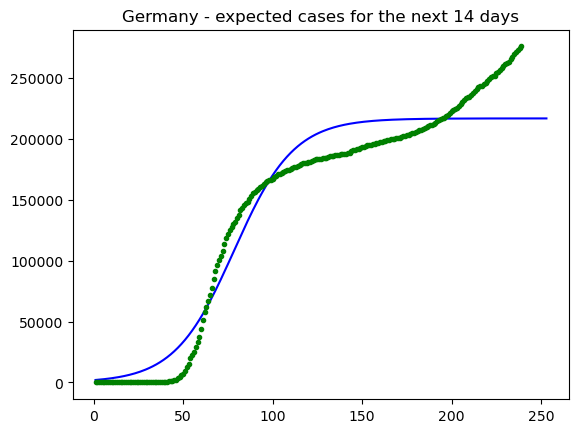

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
# plot Chart
plt.figure
plt.plot(x_array, logistic(x_array, *poptL), 'b-',label='expected log')
plt.plot(df_country_exp['Day'], df_country_exp['Confirmed'] ,".", color = 'green',label=df_country['Confirmed']  )

plt.title(''.join(country_list) + ' - expected cases'  +' for the next ' + str(expdays) + ' days' )
plt.show()

### Contries with the most confirmed cases

In [55]:
df_cases=pd.DataFrame(df_merge.groupby('Country/Region')['Confirmed'].max())
df_cases.sort_values(by='Confirmed', ascending=False).head(10)

,Confirmed
Country/Region,
US,6856884
India,5487580
Brazil,4558040
Russia,1105048
Colombia,770435
Peru,768895
Mexico,700580
Spain,671468
South Africa,661936


#### Contries with the most deaths

In [57]:
df_death_max = deaths_df_unpiv.groupby('Country/Region')['Deaths'].max()
pd.DataFrame(df_death_max.sort_values(ascending=False))

,Deaths
Country/Region,
US,199865
Brazil,137272
India,87882
Mexico,73697
United Kingdom,41788
...,...
Cambodia,0
Saint Vincent and the Grenadines,0
Dominica,0


In [59]:
country_list = ['Germany']

df_country = df_merge[df_merge['Country/Region'].isin(country_list)]
df_country = df_country[df_country['Confirmed']>=1]
zeilen= df_country['Confirmed'].count()
df_country['Day']= np.arange(1,zeilen+1)
df_country.tail(10)

,Country/Region,Province/State,Lat,Long,Date,Confirmed,Deaths,Recovered,Day
62374,Germany,NaN,51.165691,10.451526,2020/09/12,260817,9352,231953.0,230
62640,Germany,NaN,51.165691,10.451526,2020/09/13,261737,9354,232541.0,231
62906,Germany,NaN,51.165691,10.451526,2020/09/14,263222,9356,234017.0,232
63172,Germany,NaN,51.165691,10.451526,2020/09/15,265014,9367,235112.0,233
63438,Germany,NaN,51.165691,10.451526,2020/09/16,266869,9373,236623.0,234
63704,Germany,NaN,51.165691,10.451526,2020/09/17,269048,9376,238437.0,235
63970,Germany,NaN,51.165691,10.451526,2020/09/18,271247,9386,239654.0,236
64236,Germany,NaN,51.165691,10.451526,2020/09/19,272932,9388,240510.0,237
64502,Germany,NaN,51.165691,10.451526,2020/09/20,273965,9390,241192.0,238
64768,Germany,NaN,51.165691,10.451526,2020/09/21,275560,9390,242656.0,239


### Confirmed Cases plot

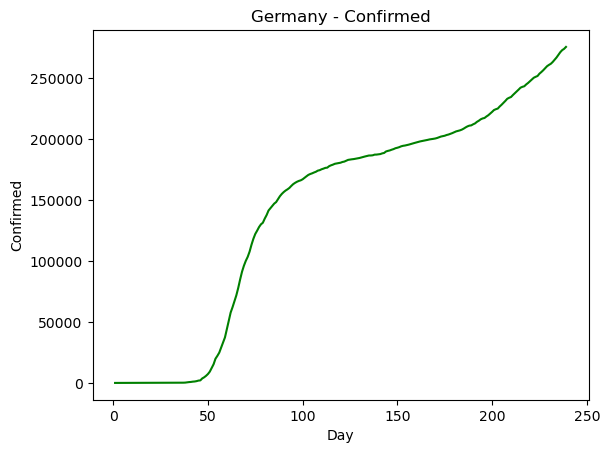

In [61]:
import matplotlib.pyplot as plt
import numpy as np

faelle = 'Confirmed'

plt.plot(df_country['Day'],df_country[faelle], color = 'green')
plt.title(' '.join(country_list) + ' - ' + faelle)
plt.xlabel('Day')
plt.ylabel(faelle)
plt.show()

In [63]:
# Filter the dataset for the specific country (e.g., 'Australia')
country = 'Germany'
confirmed_ger = confirmed_df[confirmed_df['Country/Region'] == country]

# Drop unnecessary columns: 'Province/State', 'Lat', and 'Long'
confirmed_ger = confirmed_ger.drop(columns=['Province/State', 'Lat', 'Long'])
confirmed_ger = confirmed_ger.groupby('Country/Region').sum()  # Sum up the cases for each country/region

# Transpose the dataframe so that the dates become the index, and the confirmed cases become the values
confirmed_ger = confirmed_ger.transpose()

# After transposing, the data will have one column with confirmed cases.
# Rename the single column to 'Confirmed Cases'
confirmed_ger.columns = ['Confirmed Cases']

# Convert the index (dates) to datetime
confirmed_ger.index = pd.to_datetime(confirmed_ger.index)

# Display the cleaned-up data
print(confirmed_ger.head(10))

            Confirmed Cases
2020-01-22                0
2020-01-23                0
2020-01-24                0
2020-01-25                0
2020-01-26                0
2020-01-27                1
2020-01-28                4
2020-01-29                4
2020-01-30                4
2020-01-31                5


### 5. Exploratory Data Analysis (EDA)

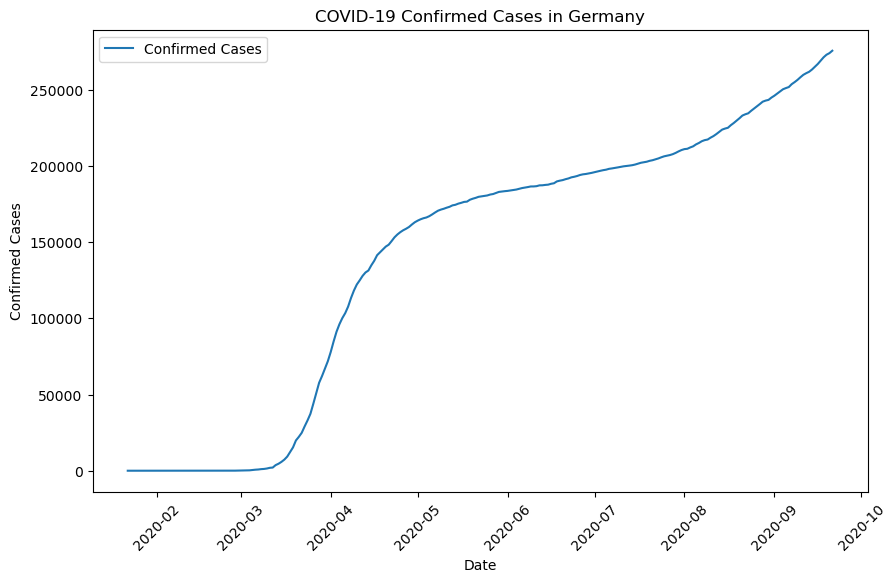

In [65]:
plt.figure(figsize=(10, 6))
plt.plot(confirmed_ger.index, confirmed_ger['Confirmed Cases'], label='Confirmed Cases')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title(f'COVID-19 Confirmed Cases in Germany')
plt.legend()
plt.xticks(rotation=45)
plt.show()

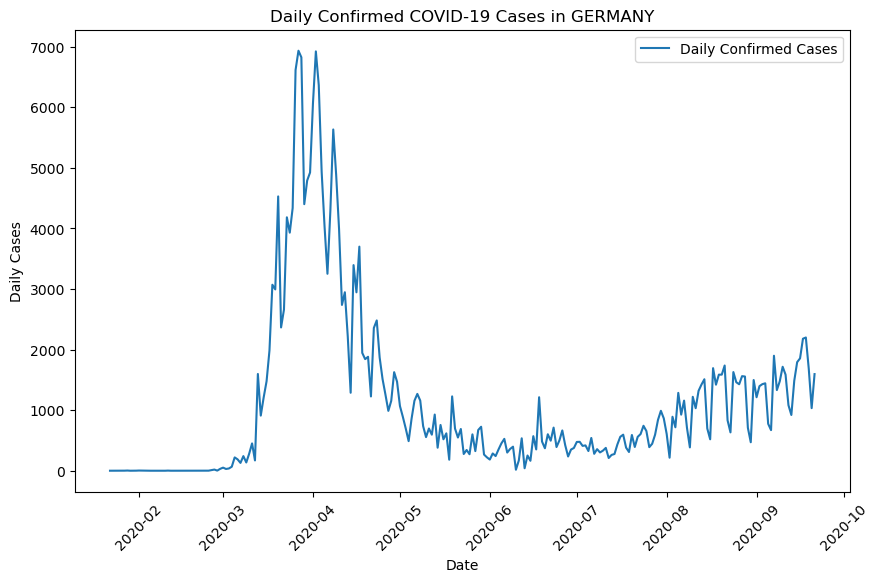

In [67]:
# Calculate daily change in confirmed cases, deaths, and recoveries
confirmed_ger_daily = confirmed_ger.diff().fillna(0)

# Plot daily confirmed cases
plt.figure(figsize=(10, 6))
plt.plot(confirmed_ger_daily.index, confirmed_ger_daily, label='Daily Confirmed Cases')
plt.title('Daily Confirmed COVID-19 Cases in GERMANY')
plt.xlabel('Date')
plt.ylabel('Daily Cases')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [69]:
# Convert columns to datetime format
confirmed_df.columns = ['Province/State', 'Country/Region', 'Lat', 'Long'] + pd.to_datetime(confirmed_df.columns[4:]).tolist()
deaths_df.columns = ['Province/State', 'Country/Region', 'Lat', 'Long'] + pd.to_datetime(deaths_df.columns[4:]).tolist()
recovered_df.columns = ['Province/State', 'Country/Region', 'Lat', 'Long'] + pd.to_datetime(recovered_df.columns[4:]).tolist()

In [71]:
# Filter data for a specific country, say 'Germany'
country = 'Germany'

# Filter for confirmed cases, deaths, and recovered for the country of interest
confirmed_country = confirmed_df[confirmed_df['Country/Region'] == country].drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long']).transpose()
deaths_country = deaths_df[deaths_df['Country/Region'] == country].drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long']).transpose()
recovered_country = recovered_df[recovered_df['Country/Region'] == country].drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long']).transpose()

In [72]:
# Rename columns to reflect the country
confirmed_country.columns = ['Confirmed']
deaths_country.columns = ['Deaths']
recovered_country.columns = ['Recovered']

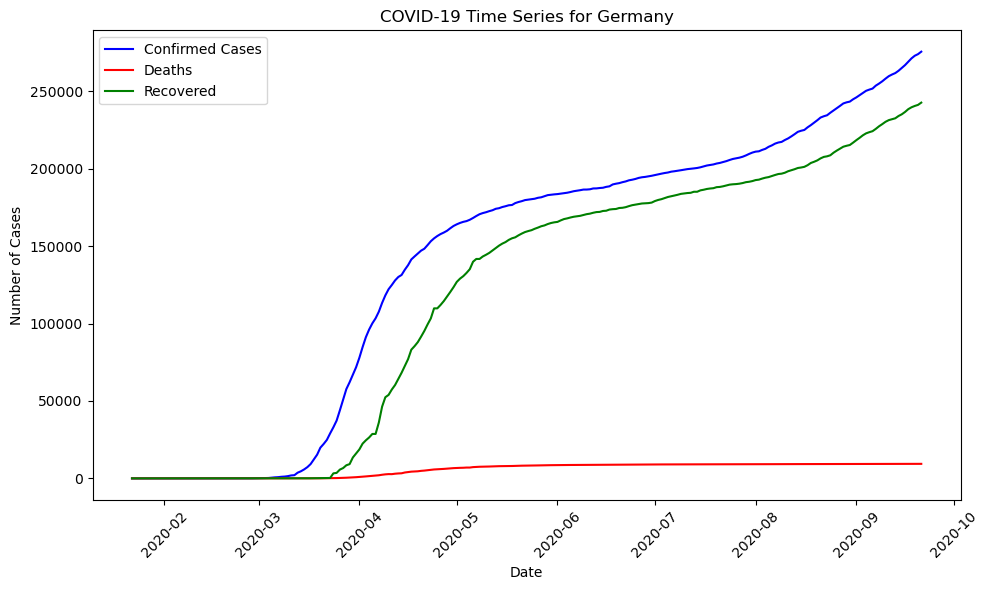

In [75]:
# Plot confirmed cases, deaths, and recoveries over time for the selected country
plt.figure(figsize=(10, 6))
plt.plot(confirmed_country.index, confirmed_country['Confirmed'], label='Confirmed Cases', color='blue')
plt.plot(deaths_country.index, deaths_country['Deaths'], label='Deaths', color='red')
plt.plot(recovered_country.index, recovered_country['Recovered'], label='Recovered', color='green')
plt.title(f'COVID-19 Time Series for Germany')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

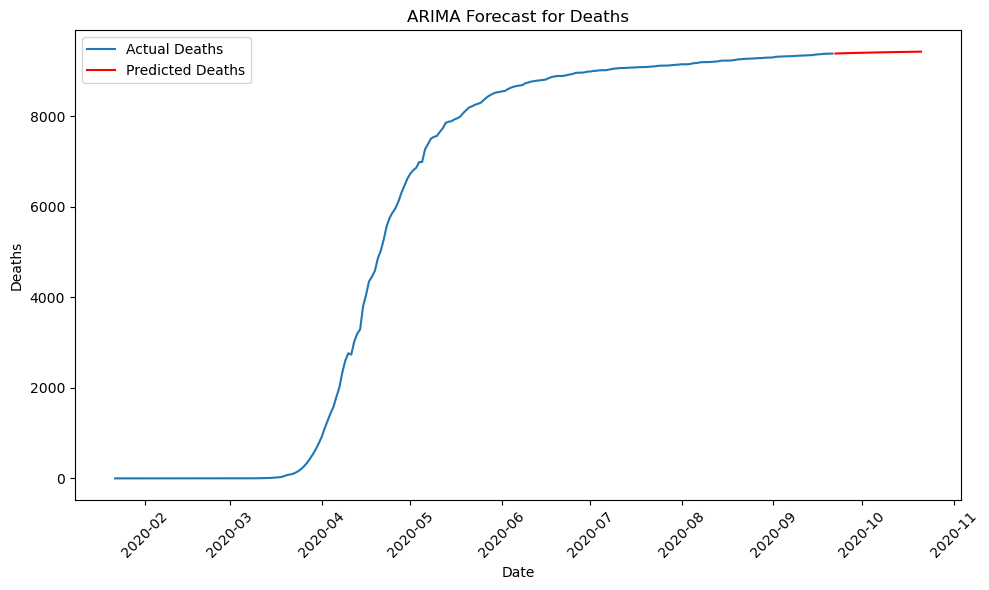

In [77]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (p=5, d=1, q=0 as an example, you may need to experiment with different parameters)
model = ARIMA(deaths_country['Deaths'], order=(5, 1, 0))
model_fit = model.fit()

# Make predictions for the next 30 days (for example)
forecast = model_fit.forecast(steps=30)

# Plot the actual vs forecasted deaths
plt.figure(figsize=(10,6))
plt.plot(deaths_country.index, deaths_country['Deaths'], label='Actual Deaths')
plt.plot(pd.date_range(deaths_country.index[-1], periods=31, freq='D')[1:], forecast, label='Predicted Deaths', color='red')
plt.title('ARIMA Forecast for Deaths')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [79]:
confirmed_ger['RollingAvg'] = confirmed_ger.iloc[:, 0].rolling(window=7).mean()

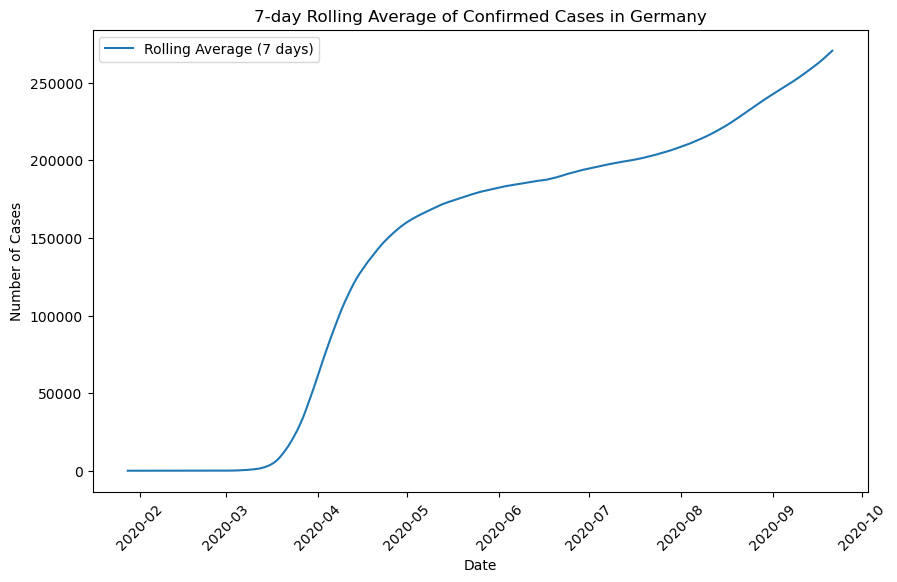

In [81]:
# Plot the rolling average
plt.figure(figsize=(10, 6))
plt.plot(confirmed_ger.index, confirmed_ger['RollingAvg'], label='Rolling Average (7 days)')
plt.title('7-day Rolling Average of Confirmed Cases in Germany')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [83]:
df_merge['Date'] = pd.to_datetime(df_merge['Date'])

In [85]:
corr_matrix = df_merge[['Confirmed', 'Deaths', 'Recovered']].corr()

### Feature Selection

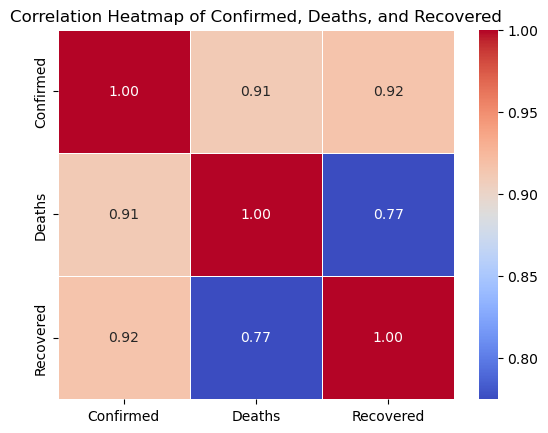

In [87]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Confirmed, Deaths, and Recovered')
plt.show()

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [91]:
# Prepare the data for the model
confirmed_ger['Days'] = (confirmed_ger.index - confirmed_ger.index.min()).days
X = confirmed_ger[['Days']]  # Feature: number of days since the first case
y = confirmed_ger.iloc[:, 0]  # Target: confirmed cases

In [93]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

### Model Creation

In [95]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [97]:
# Predict the future (for the next 30 days)
future_days = pd.DataFrame({'Days': range(X['Days'].max() + 1, X['Days'].max() + 31)})
predictions = model.predict(future_days)

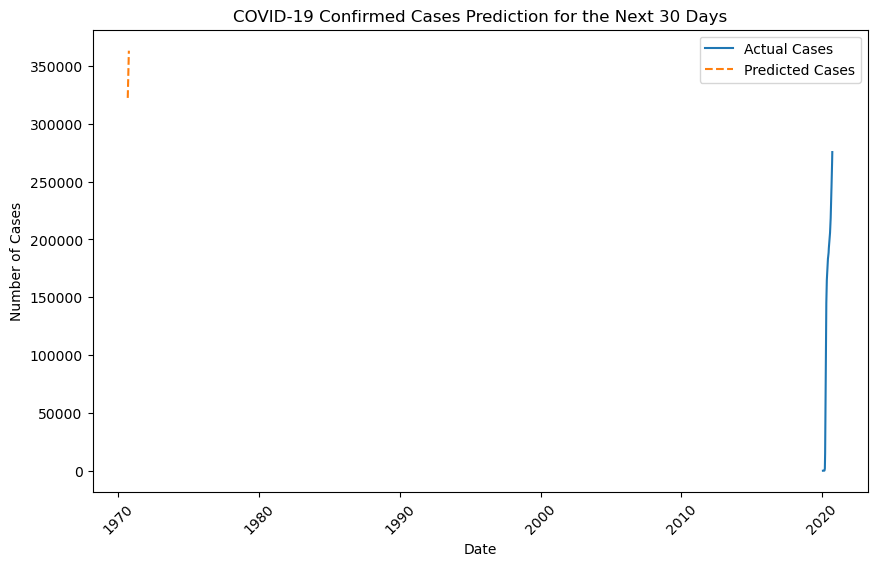

In [99]:
# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(confirmed_ger.index, confirmed_ger.iloc[:, 0], label='Actual Cases')
plt.plot(future_days, predictions, label='Predicted Cases', linestyle='dashed')
plt.title('COVID-19 Confirmed Cases Prediction for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.xticks(rotation=45)
plt.show()

### ARIMA Model
- P= Past Values
- I = differencing
- Q= Past Error

In [101]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (p, d, q)
model = ARIMA(confirmed_ger.iloc[:, 0], order=(1,2,1))
model_fit = model.fit()

In [103]:
# Predict the next 30 days
forecast = model_fit.forecast(steps=30)

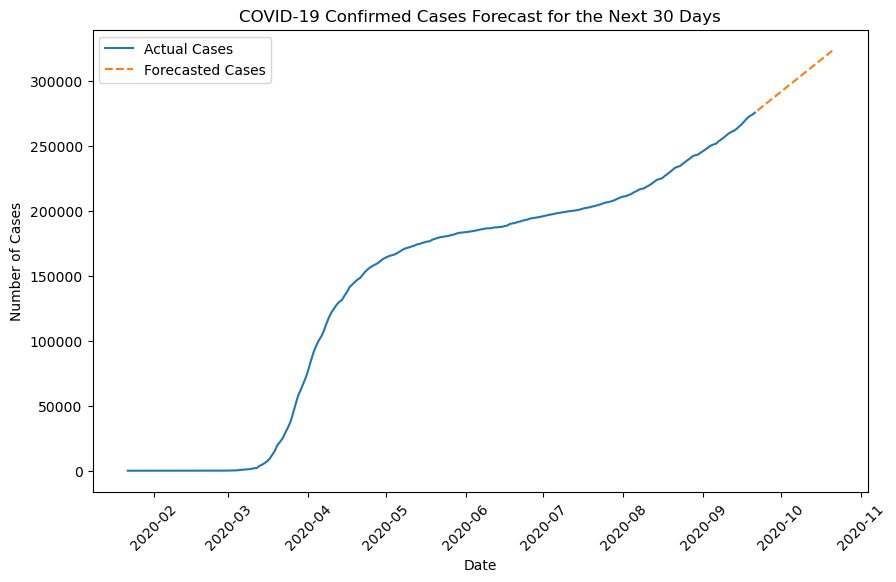

In [105]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(confirmed_ger.index, confirmed_ger.iloc[:, 0], label='Actual Cases')
plt.plot(pd.date_range(confirmed_ger.index[-1], periods=31, freq='D')[1:], forecast, label='Forecasted Cases', linestyle='dashed')
plt.title('COVID-19 Confirmed Cases Forecast for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.xticks(rotation=45)
plt.show()

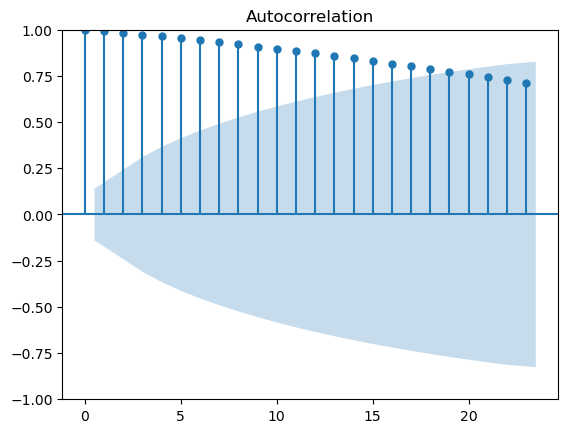

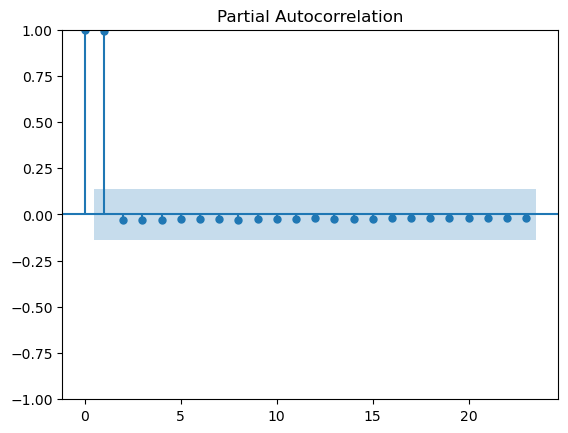

In [107]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF
plot_acf(y_train)
plot_pacf(y_train)
plt.show()

### Model Evaluation

In [109]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Fit the ARIMA model
model = ARIMA(y_train, order=(1,2,1))  # Replace p, d, q with your values
model_fit = model.fit()

# Step 2: Predict on the test set using the fitted model
y_pred = model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, dynamic=False)

# Step 3: Calculate MSE and R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE (Mean Squared Error): {mse}')
print(f'R² (R-squared): {r2}')


MSE (Mean Squared Error): 61143869.321031004
R² (R-squared): 0.8185140269955934


### Flask Deployment Link
 http://127.0.0.1:5000 

### Challenges Faced and Solutions
- Data Quality Issues
    - Missing Values in Province/State Column.
    - Handling Large Dataset with Numerous Features.
    - Unpivoting the Data.
    - Time Series Forecasting with ARIMA Model.
    - Performance Evaluation of Predictive Models.
- Model Performance
    - Feature selection techniques were used to reduce the dimensionality of the data.
    - The data was unpivoted to transform it into a long format, which is better suited for time series analysis.
    - The ARIMA model was selected, and careful parameter tuning was performed to ensure that the best fit for the data was achieved.
    - Feature selection was used to avoid overfitting.

### Suggestions to the Government:
- Resource Allocation: Use ARIMA model forecasts to allocate healthcare resources (hospital beds, ventilators) in regions predicted to experience surges in cases.
- Early Warning Systems: Implement systems that track potential spikes and enable timely interventions, like increasing hospital capacity or activating emergency protocols.
- Public Health Campaigns: Focus on regions with predicted surges, promoting vaccination, social distancing, and mask-wearing to reduce future infections.
- Surveillance & Data Collection: Enhance surveillance for new variants and update predictive models with real-time data for accuracy.
- Vaccine Distribution: Prioritize vaccine rollouts in high-risk areas to reduce severe cases.
- Healthcare Workforce Support: Strengthen the healthcare workforce with additional staff, training, and protective equipment.
- Testing & Contact Tracing: Increase testing and contact tracing in high-transmission regions to identify and isolate cases quickly.
- Emergency Plans: Refine preparedness plans for scalable healthcare and logistical support during future surges.
- Data-Driven Policies: Adjust policies regularly based on predictive trends for better pandemic management.

### Conclusion
- The analysis of the Johns Hopkins University COVID-19 dataset highlighted global trends in cases, deaths, and recoveries. By cleaning and transforming the data, we applied the ARIMA model for time series forecasting, achieving good accuracy with an R-squared value of 0.82. 
- Challenges like missing values, large feature sets, and data unpivoting were addressed through feature selection, log transformations, and focusing on relevant data. 
- The findings, including daily trends and forecasts, provide valuable insights for managing the pandemic. The analysis emphasizes the role of predictive models in planning for future healthcare needs and responding to ongoing COVID-19 developments.

                                                    ---------------------------------